<a href="https://colab.research.google.com/github/annisafitria/ImageRetrieval_219-231/blob/main/image_processing/ip_adapative_thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download mohamedhanyyy/chest-ctscan-images

 89% 105M/119M [00:01<00:00, 77.1MB/s] 
100% 119M/119M [00:01<00:00, 81.9MB/s]


In [8]:
# import the necessary packages
import matplotlib.pyplot as plt
import cv2
import os
from zipfile import ZipFile

In [9]:
zipfile = "chest-ctscan-images.zip"
with ZipFile(zipfile, 'r') as zip:
  zip.extractall()
  print("Dataset has been unzipped")

Dataset has been unzipped


In [7]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [10]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/Data/test/adenocarcinoma/000108 (3).png"
}

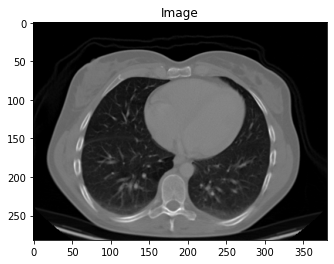

In [11]:
# load the image and display it
image = cv2.imread(args["image"])
plt_imshow("Image", image)

# convert the image to grayscale and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

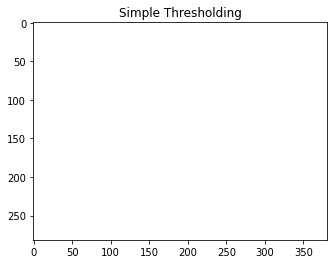

In [12]:
# apply simple thresholding with a hardcoded threshold value
(T, threshInv) = cv2.threshold(blurred, 230, 255,
	cv2.THRESH_BINARY_INV)
plt_imshow("Simple Thresholding", threshInv)

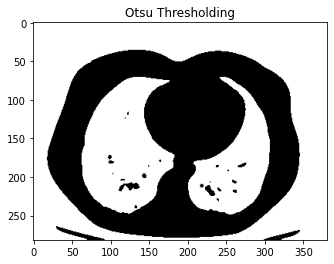

In [13]:
# apply Otsu's automatic thresholding
(T, threshInv) = cv2.threshold(blurred, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt_imshow("Otsu Thresholding", threshInv)

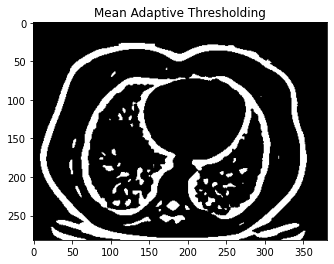

In [14]:
# instead of manually specifying the threshold value, we can use
# adaptive thresholding to examine neighborhoods of pixels and
# adaptively threshold each neighborhood
thresh = cv2.adaptiveThreshold(blurred, 255,
	cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
plt_imshow("Mean Adaptive Thresholding", thresh)

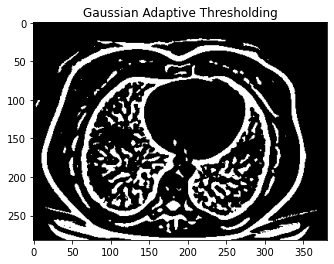

In [15]:
# perform adaptive thresholding again, this time using a Gaussian
# weighting versus a simple mean to compute our local threshold
# value
thresh = cv2.adaptiveThreshold(blurred, 255,
	cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
plt_imshow("Gaussian Adaptive Thresholding", thresh)